In [2]:
import numpy as np
import geopandas as gpd

from pyinterpolate.io_ops import prepare_areal_shapefile, get_points_within_area  # Prepare data
#from pylab import rcParams
from pyinterpolate.semivariance import calculate_semivariance  # Experimental semivariogram
from pyinterpolate.semivariance import RegularizedSemivariogram  # Semivariogram regularization class

import matplotlib.pyplot as plt

In [3]:
import os
os.chdir('/mnt/f/Research Work/COVID-2019/Canada/ON')

In [4]:
areal_data = 'age_adjusted/areal_dataJan21/areal_Jan21.shp'
point_data = 'census_data_use/QGIS_points/Points_15kJan21/Points_15k.shp'
# The important thing before analysis is to check if crs of areal data and point data are the same
areal_crs = gpd.read_file(areal_data).crs
point_support_crs = gpd.read_file(point_data).crs

In [5]:
# We need to know:
# - id column name of areal units,
# - value column name of areal units (usually aggregates),
# - value column name of point support units (usually population)
# Let's check it quickly with geopandas
areal = gpd.read_file(areal_data)
areal
#areal.dtypes

,PHU_ID,OGF_ID,PHU_NAME_E,PHU_NAME_F,GEOMETR,EFFECTI,SYSTEM_,OBJECTI,X,Ggrphy1,HRUID20,Ag_Ad_R,Raw_Rat,POP_Rsk,geometry
0,2270,71878062,York Region Public Health,Service de santé de la région de York,1970/01/01,2020/05/15,2020/05/15,321,34,York Regional Health Unit,3570,2181.8297,2167.3572,1173648,"POLYGON ((1324305.344 725659.294, 1324302.019 ..."
1,5183,71878005,Huron Perth Health Unit,Circonscription Sanitaire de Huron et Perth,2020/05/15,2020/05/15,2020/05/15,337,12,"Huron, Perth County Health Unit",3539,842.8279,852.2041,146412,"POLYGON ((1135752.779 648210.068, 1135963.059 ..."
2,2265,71878059,"Region of Waterloo, Public Health",Bureau de santé de la région de Waterloo,1970/01/01,2020/05/15,2020/05/15,353,31,Waterloo Health Unit,3565,1572.2433,1596.3995,604614,"POLYGON ((1249131.681 614870.397, 1250055.069 ..."
3,4913,71878029,Southwestern Public Health,Bureau de santé du Sud-Ouest,2020/05/15,2020/05/15,2020/05/15,369,26,Southwestern Health Unit,3575,1086.1180,1071.0257,212408,"POLYGON ((1228880.020 582279.001, 1229084.568 ..."
4,2237,71878057,Hamilton Public Health Services,Services de santé publique de Hamilton,1970/01/01,2020/05/15,2020/05/15,385,10,Hamilton Health Unit,3537,1588.8738,1610.7602,582173,"POLYGON ((1298169.990 595378.496, 1298164.335 ..."
5,2262,71878051,Thunder Bay District Health Unit,Bureau de santé du district de Thunder Bay,1970/01/01,2020/05/15,2020/05/15,401,28,Thunder Bay District Health Unit,3562,620.1485,622.1351,158672,"MULTIPOLYGON (((456481.742 2026226.191, 456454..."
6,2253,71878041,Peel Public Health,Bureau de santé de la région de Peel,1970/01/01,2020/05/15,2020/05/15,417,21,Peel Regional Health Unit,3553,3499.9508,3555.4452,1566451,"POLYGON ((1297167.297 659975.773, 1297574.073 ..."
7,2242,71878038,Lambton Public Health,Comté de Lambton,1970/01/01,2020/05/15,2020/05/15,433,14,Lambton Health Unit,3542,1401.7413,1389.1094,131051,"MULTIPOLYGON (((1147832.450 567241.999, 114854..."
8,2266,71878035,Wellington-Dufferin-Guelph Health Unit,Bureau de santé de Wellington-Dufferin-Guelph,1970/01/01,2020/05/15,2020/05/15,449,32,Wellington-Dufferin-Guelph Health Unit,3566,1384.2281,1389.8104,310209,"POLYGON ((1267837.849 692444.503, 1268151.615 ..."
9,2227,71878032,Brant County Health Unit,Bureau de santé du comté de Brant,1970/01/01,2020/05/15,2020/05/15,465,2,Brant Health Unit,3527,997.3033,983.2223,148902,"POLYGON ((1271083.347 582033.624, 1271555.555 ..."


In [9]:
point = gpd.read_file(point_data)

In [11]:
# Now prepare data for further processing

areal_id = 'PHU_ID'
areal_val = 'Ag_Ad_R'
points_val = 'POP_Rs1'

areal_data_prepared = prepare_areal_shapefile(areal_data, areal_id, areal_val)

#points_in_area = get_points_within_area(areal_data, point_data, areal_id_col_name=areal_id,
                                        #points_val_col_name=points_val)
#points_in_area

In [12]:
areal_data_prepared

array([[2270,
        1318020.0261804138, 681641.4694268486, 2181.8297],
       [5183,
        1180323.147731154, 604370.8009265423, 842.8279],
       [2265,
        1242109.0714768309, 599306.872131091, 1572.2433],
       [4913,
        1216090.9298161438, 534045.7556150511, 1086.118],
       [2237,
        1292329.2756316697, 584518.8222756136, 1588.8738],
       [2262,
        524951.4604602047, 1486913.1707470675, 620.1485],
       [2253,
        1293781.2094795448, 642187.7380046498, 3499.9508],
       [2242,
        1125660.0124205009, 513677.0603416354, 1401.7413],
       [2266,
        1247931.885774101, 644162.7378746723, 1384.2281],
       [2227,
        1267952.6224151833, 565292.6091261941, 997.3033],
       [2244,
        1177198.8113986435, 535985.5603496112, 1108.7107],
       [2261,
        1059172.147575776, 993492.5861505534, 253.6328],
       [2235,
        1375908.6603848068, 766680.737189454, 462.089],
       [2246,
        1347716.87007479, 571487.443624623, 1619.

In [13]:
points_in_area = get_points_within_area(areal_data, point_data, areal_id_col_name=areal_id,
                                        points_val_col_name=points_val)
points_in_area

/home/muji/anaconda3/envs/py37/lib/python3.7/site-packages/pyinterpolate/io_ops/get_points_within_area.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(output_points_within_area)


array([[2249.0, array([[6.750000e+04, 1.177500e+06, 6.441811e+02],
                       [6.750000e+04, 1.192500e+06, 0.000000e+00],
                       [6.750000e+04, 1.207500e+06, 3.152600e+01],
                       ...,
                       [4.575000e+05, 1.402500e+06, 0.000000e+00],
                       [4.575000e+05, 1.417500e+06, 0.000000e+00],
                       [4.575000e+05, 1.432500e+06, 0.000000e+00]])],
       [2262.0, array([[ 337500., 1702500.,       0.],
                       [ 337500., 1717500.,       0.],
                       [ 337500., 1732500.,       0.],
                       ...,
                       [ 787500., 1117500.,       0.],
                       [ 787500., 1132500.,       0.],
                       [ 787500., 1147500.,       0.]])],
       [2256.0, array([[ 592500., 1882500.,       0.],
                       [ 592500., 1897500.,       0.],
                       [ 592500., 1912500.,       0.],
                       ...,
             

In [14]:
from pyinterpolate.distance.calculate_distances import calc_point_to_point_distance  # We need this to find max distance between points
areal_data_prepared_distances = areal_data_prepared[:, 2:]
distances_areal = calc_point_to_point_distance(areal_data_prepared_distances[:, :-1])
#areal_data_prepared_distances
maximum_range_areal = np.max(distances_areal)
print(maximum_range_areal)
print(areal_data_prepared_distances)

1480642.832336998
[[1318020.0261804138 681641.4694268486 2181.8297]
 [1180323.147731154 604370.8009265423 842.8279]
 [1242109.0714768309 599306.872131091 1572.2433]
 [1216090.9298161438 534045.7556150511 1086.118]
 [1292329.2756316697 584518.8222756136 1588.8738]
 [524951.4604602047 1486913.1707470675 620.1485]
 [1293781.2094795448 642187.7380046498 3499.9508]
 [1125660.0124205009 513677.0603416354 1401.7413]
 [1247931.885774101 644162.7378746723 1384.2281]
 [1267952.6224151833 565292.6091261941 997.3033]
 [1177198.8113986435 535985.5603496112 1108.7107]
 [1059172.147575776 993492.5861505534 253.6328]
 [1375908.6603848068 766680.737189454 462.089]
 [1347716.87007479 571487.443624623 1619.9674]
 [1132693.3156500005 464915.7126838723 1221.6254]
 [1505325.6136488076 784889.9318625045 314.6643]
 [1084436.7494113315 427546.0453176384 2828.6679]
 [1403578.320139042 750180.2341252831 361.6114]
 [1187262.430280746 696405.206200478 385.0007]
 [1638070.3344983133 884369.4222652296 1169.8836]
 [1

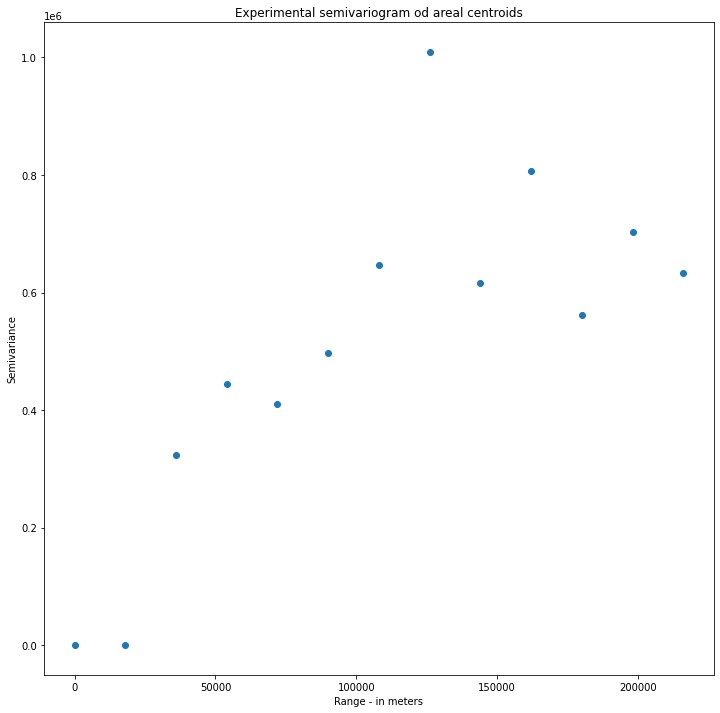

In [15]:
# Check experimental semivariogram of areal data - this cell may be run multiple times 
# before you find optimal parameters

maximum_range = 220000
step_size = 18000

dt = areal_data_prepared[:, 2:]  # x, y, val
exp_semivar = calculate_semivariance(data=dt, step_size=step_size, max_range=maximum_range)

# Plot experimental semivariogram

plt.figure(figsize=(12, 12))
plt.plot(exp_semivar[:, 0], exp_semivar[:, 1],'o')
plt.title('Experimental semivariogram od areal centroids')
plt.xlabel('Range - in meters')
plt.ylabel('Semivariance')
plt.show()

<class 'numpy.ndarray'>
4553
[1177500. 1192500. 1207500. ...  892500.  907500.  922500.]


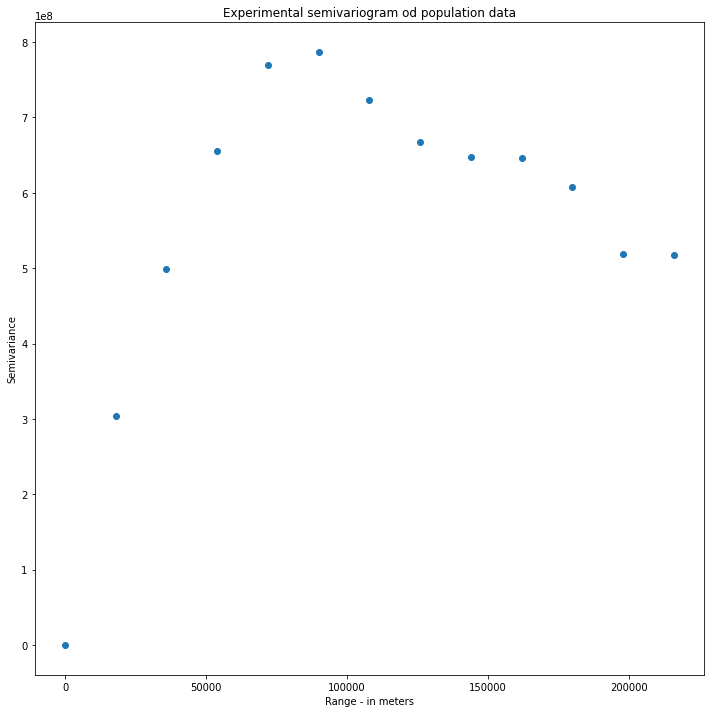

In [16]:
# Check experimental semivariogram of point data - this cell may be run multiple times 
# before you find optimal parameters

def build_point_array(points):
    a = None

    for rec in points:
        if a is None:
            a = rec.copy()
        else:
            a = np.vstack((a, rec))

    return a

maximum_point_range = 220000
step_size_points = 18000


pt = build_point_array(points_in_area[:, 1])  # x, y, val
pt
print(type(pt))
print(len(pt))
print(pt[:,1])
#pt[:,1] = pt[:,1].astype(int)
#pt[:,2] = pt[:,2].astype(int)
exp_semivar = calculate_semivariance(data=pt, step_size=step_size_points, max_range=maximum_point_range)
# Plot experimental semivariogram

plt.figure(figsize=(12, 12))
plt.plot(exp_semivar[:, 0], exp_semivar[:, 1], 'o')
plt.title('Experimental semivariogram od population data')
plt.xlabel('Range - in meters')
plt.ylabel('Semivariance')
plt.show()

/home/muji/anaconda3/envs/py37/lib/python3.7/site-packages/pyinterpolate/semivariance/areal_semivariance/block_to_block_semivariance/calculate_block_to_block_semivariance.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  output_array = np.array([block_to_block_semivariance, blocks_ids])


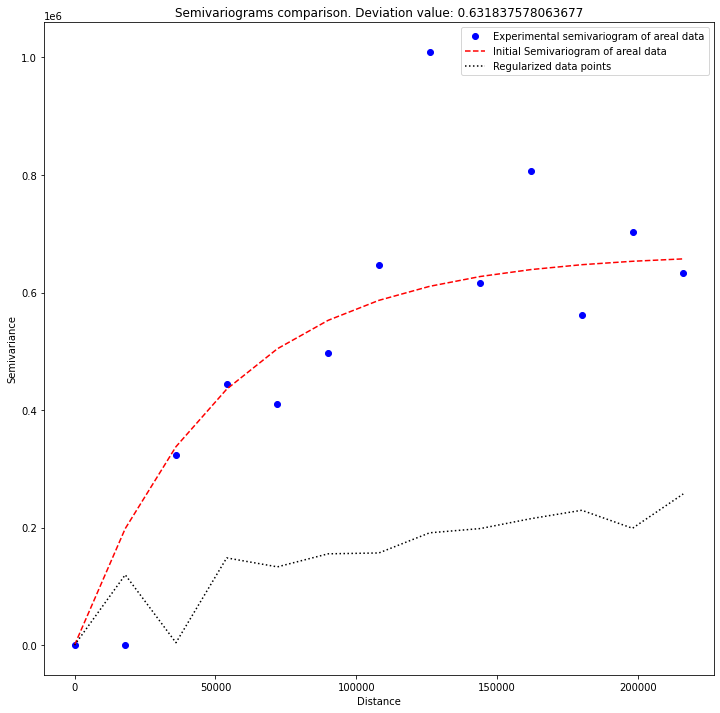

In [17]:
reg_mod = RegularizedSemivariogram()
maximum_range = 220000
reg_mod.fit(areal_data=areal_data_prepared,
            areal_step_size=step_size, max_areal_range=maximum_range,
            point_support_data=points_in_area, weighted_lags=True, store_models=True)
# Check initial experimental, theoretical and regularized semivariograms

lags = reg_mod.experimental_semivariogram_of_areal_data[:, 0]
plt.figure(figsize=(12, 12))
plt.plot(lags, reg_mod.experimental_semivariogram_of_areal_data[:, 1], 'ob')
plt.plot(lags, reg_mod.initial_theoretical_model_of_areal_data.predict(lags), color='r', linestyle='--')
plt.plot(lags, reg_mod.initial_regularized_model, color='black', linestyle='dotted')
plt.legend(['Experimental semivariogram of areal data', 'Initial Semivariogram of areal data',
            'Regularized data points'])
plt.title('Semivariograms comparison. Deviation value: {}'.format(reg_mod.initial_deviation))
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()

In [18]:
reg_mod.transform(max_iters=10)

  0%|          | 0/10 [00:00<?, ?it/s]/home/muji/anaconda3/envs/py37/lib/python3.7/site-packages/pyinterpolate/semivariance/semivariogram_fit/fit_semivariance.py:301: UserWarning: WARNING: linear model fitted to the experimental variogram is better than the core models!
  warnings.warn(warning_msg)
/home/muji/anaconda3/envs/py37/lib/python3.7/site-packages/pyinterpolate/semivariance/areal_semivariance/block_to_block_semivariance/calculate_block_to_block_semivariance.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  output_array = np.array([block_to_block_semivariance, blocks_ids])
100%|██████████| 10/10 [15:08<00:00, 90.87s/it]


In [25]:
reg_mod.transform(max_iters=15)

100%|██████████| 15/15 [06:08<00:00, 24.55s/it]


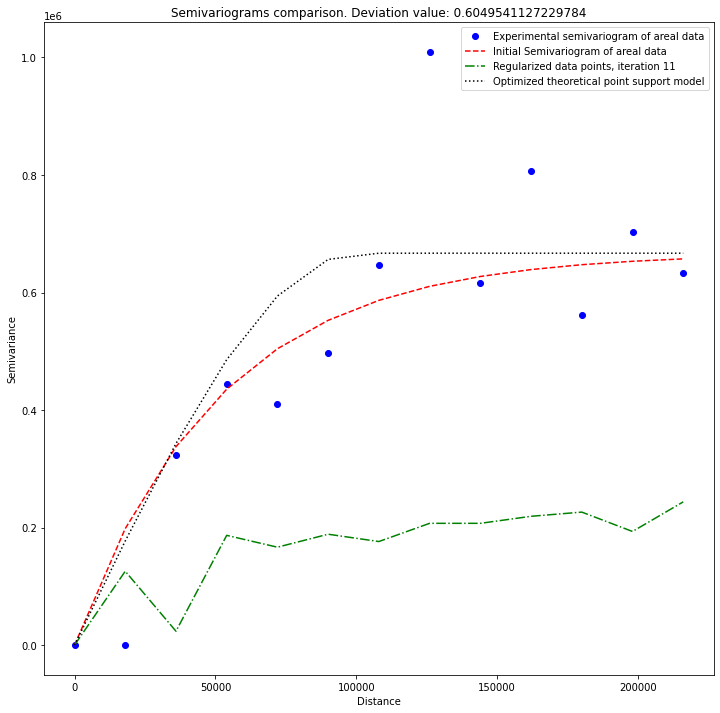

In [19]:
reg_mod.show_semivariograms()

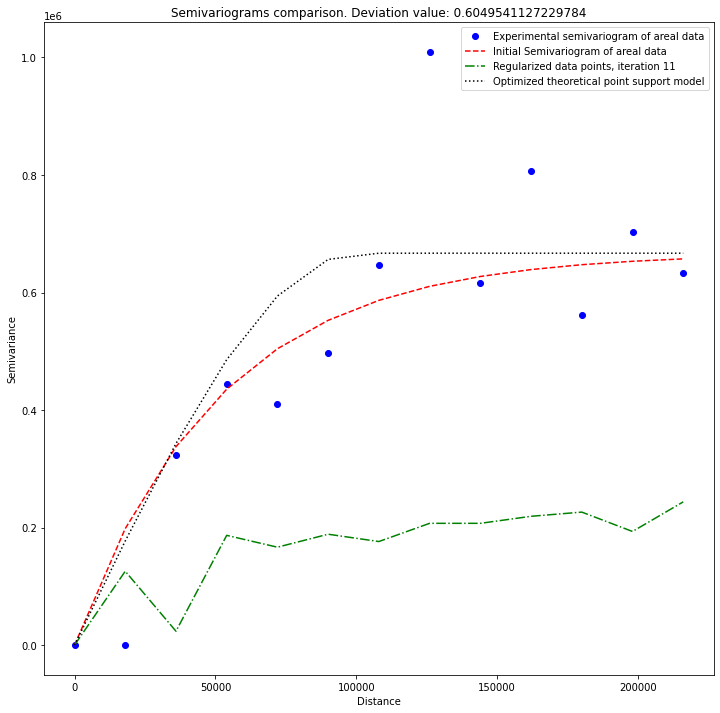

In [13]:
reg_mod.show_semivariograms()

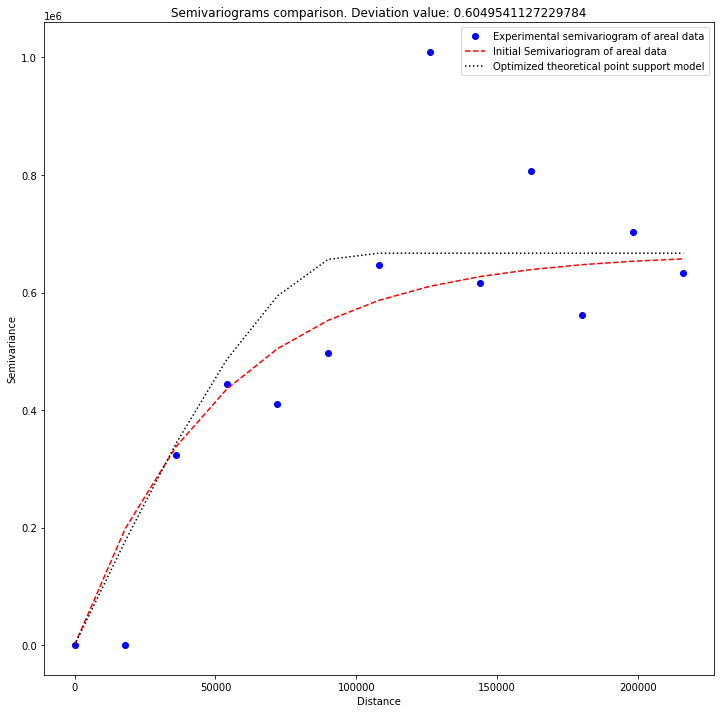

In [20]:
lags = reg_mod.experimental_semivariogram_of_areal_data[:, 0]
plt.figure(figsize = (12, 12))
#lags = reg_mod.experimental_semivariogram_of_areal_data[:, 0]
        #plt.figure(figsize=(12, 12))
plt.plot(lags,reg_mod.experimental_semivariogram_of_areal_data[:, 1], 'bo')
plt.plot(lags,reg_mod.initial_theoretical_model_of_areal_data.predict(lags), color='r',linestyle='--')
#plt.plot(lags, reg_mod.optimal_regularized_model, color='g',linestyle='-.')
plt.plot(lags,reg_mod.optimal_theoretical_model.predict(lags), color='black', linestyle='dotted')
plt.legend(['Experimental semivariogram of areal data', 'Initial Semivariogram of areal data',
            #'Regularized data points, iteration {}'.format(reg_mod.iter),
            'Optimized theoretical point support model'])
plt.title('Semivariograms comparison. Deviation value: {}'.format(reg_mod.optimal_deviation))
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.savefig('ATP/semivariograms/semivariograms_Jan2122.png')
plt.show()
#plt.savefig('ATP/semivariograms/semivariograms_april20.png')

In [27]:
reg_mod.export_regularized_model('ATP/regularized_modelJan21.csv')

In [12]:
from pyinterpolate.semivariance import TheoreticalSemivariogram
semivariogram = TheoreticalSemivariogram()  # Create TheoreticalSemivariogram object
semivariogram.import_model('ATP/regularized_modelJan21.csv')  # Load regularized semivariogram

In [16]:
number_of_obs = 8
radius = 18000

# Get crs

gdf_crs = gpd.read_file(areal_data).crs
from pyinterpolate.kriging import ArealKriging
kriging_model = ArealKriging(semivariogram_model=semivariogram,
    known_areas=areal_data_prepared,
    known_areas_points=points_in_area,
    kriging_type='atp')

smoothed_area = kriging_model.regularize_data(number_of_neighbours=number_of_obs,
                                              max_search_radius=radius,
                                              data_crs=gdf_crs)

In [17]:
smoothed_area

,id,geometry,reg.est,reg.err,rmse
0,2270,POINT (1297500.000 667500.000),41.177036,260.359251,355.043274
1,2270,POINT (1312500.000 652500.000),1157.374746,344.697633,355.043274
2,2270,POINT (1312500.000 667500.000),358.957267,349.350551,355.043274
3,2270,POINT (1312500.000 682500.000),312.969150,289.904022,355.043274
4,2270,POINT (1312500.000 697500.000),52.529342,168.584029,355.043274
...,...,...,...,...,...
4548,2226,POINT (1057500.000 937500.000),0.000000,0.000000,361.874705
4549,2226,POINT (1057500.000 952500.000),0.000000,0.000000,361.874705
4550,2226,POINT (1072500.000 862500.000),0.000000,0.000000,361.874705
4551,2226,POINT (1072500.000 877500.000),10.900507,345.166116,361.874705


In [18]:
smoothed_area['reg.est'].max()

1202.2592320975707

In [19]:
smoothed_area.to_file('ATP/smoothed_atp_Jan/Jan_220/smoothed.shp')

CPLE_NotSupported in driver ESRI Shapefile does not support creation option ENCODING


In [20]:
number_of_obs = 8
radius = 18000

# Get crs

gdf_crs = gpd.read_file(areal_data).crs
from pyinterpolate.kriging import ArealKriging
kriging_model2_ata = ArealKriging(semivariogram_model=semivariogram,
    known_areas=areal_data_prepared,
    known_areas_points=points_in_area,
    kriging_type='ata')

smoothed_area2_ata = kriging_model2_ata.regularize_data(number_of_neighbours=number_of_obs,
                                              max_search_radius=radius,
                                              data_crs=gdf_crs)

In [21]:
smoothed_area2_ata

,id,geometry,reg.est,reg.err,rmse
0,2270,"POLYGON ((1324305.343725542 725659.2941726296,...",2536.872974,210.150378,355.043274
1,5183,"POLYGON ((1135752.778674917 648210.0679091114,...",1124.276090,329.389696,281.448190
2,2265,"POLYGON ((1249131.681264679 614870.3974717301,...",805.464918,0.000000,766.778382
3,4913,"POLYGON ((1228880.019879213 582279.0008932372,...",1052.554103,343.284788,33.563897
4,2237,"POLYGON ((1298169.989699582 595378.4957735761,...",669.453221,0.000000,919.420579
5,2262,"(POLYGON ((456481.7415631314 2026226.19066819,...",356.075365,143.622284,264.073135
6,2253,"POLYGON ((1297167.296807085 659975.7731191884,...",2012.423889,0.000000,1487.526911
7,2242,(POLYGON ((1147832.449516126 567241.9986961872...,1364.844876,189.434636,36.896424
8,2266,"POLYGON ((1267837.848945254 692444.5025084217,...",1876.447848,246.456892,492.219748
9,2227,"POLYGON ((1271083.3472428 582033.6238527499, 1...",1141.165904,0.000000,143.862604


In [22]:
smoothed_area2_ata.to_file('ATA/smoothed_ata_Jan/Jan_220/smoothed.shp')

CPLE_NotSupported in driver ESRI Shapefile does not support creation option ENCODING


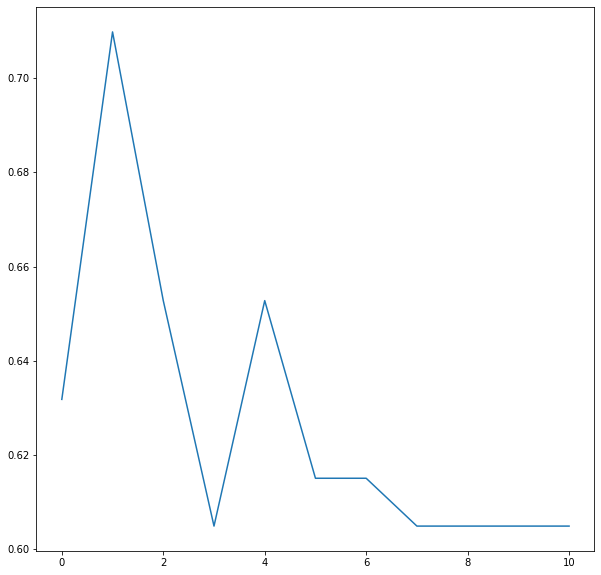

In [23]:
 #First analyze deviation

plt.figure(figsize=(10, 10))
plt.plot(reg_mod.deviations)
plt.show()

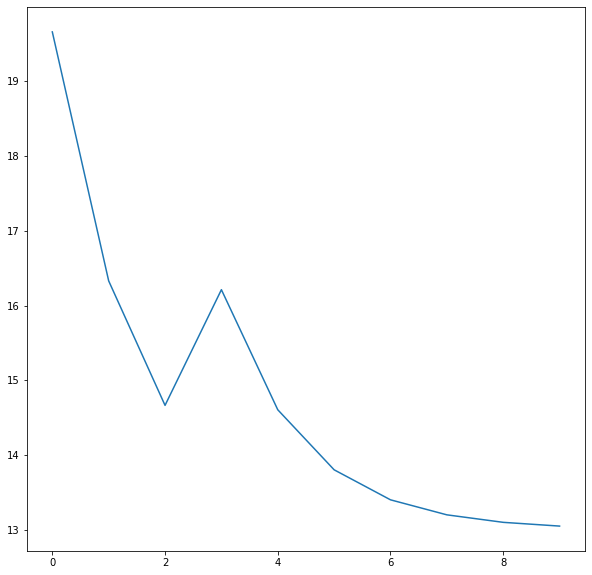

In [24]:
weights = reg_mod.weights
weights = [sum(w) for w in weights]

plt.figure(figsize=(10,10))
plt.plot(weights)
plt.show()

In [27]:
rectangles = gpd.read_file('census_data_use/python_rectangles/rectangles_15kJan21/rectangles_POPrs.shp')

In [28]:
#rectangles
#smoothed_area = gpd.read_file('ATP/smoothed_atp_Sep/Sep_234_weighted/smoothed.shp')
ndf = gpd.sjoin(smoothed_area, rectangles, how='left', op='intersects')
ndf['index_right'] = ndf.index_right.astype(int)+1
ndf
#smoothed_area

,id,geometry,reg.est,reg.err,rmse,index_right,left,bottom,right,top,NUMPOINTS,ID,POP_Rs1
0,2270,POINT (1297500.000 667500.000),41.177036,260.359251,355.043274,4482,1290000.0,660000.0,1305000.0,675000.0,134.0,4482,13934.1688
1,2270,POINT (1312500.000 652500.000),1157.374746,344.697633,355.043274,4511,1305000.0,645000.0,1320000.0,660000.0,1835.0,4511,328333.2642
2,2270,POINT (1312500.000 667500.000),358.957267,349.350551,355.043274,4512,1305000.0,660000.0,1320000.0,675000.0,761.0,4512,123694.6650
3,2270,POINT (1312500.000 682500.000),312.969150,289.904022,355.043274,4513,1305000.0,675000.0,1320000.0,690000.0,865.0,4513,139983.9854
4,2270,POINT (1312500.000 697500.000),52.529342,168.584029,355.043274,4514,1305000.0,690000.0,1320000.0,705000.0,300.0,4514,34601.5540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4548,2226,POINT (1057500.000 937500.000),0.000000,0.000000,361.874705,3668,1050000.0,930000.0,1065000.0,945000.0,0.0,3668,0.0000
4549,2226,POINT (1057500.000 952500.000),0.000000,0.000000,361.874705,3669,1050000.0,945000.0,1065000.0,960000.0,0.0,3669,0.0000
4550,2226,POINT (1072500.000 862500.000),0.000000,0.000000,361.874705,3715,1065000.0,855000.0,1080000.0,870000.0,0.0,3715,0.0000
4551,2226,POINT (1072500.000 877500.000),10.900507,345.166116,361.874705,3716,1065000.0,870000.0,1080000.0,885000.0,62.0,3716,2030.8885


In [29]:
ndf.to_file('ATP/smoothed_atp_Jan/Jan_220_combine/smoothed_combine.shp')

CPLE_NotSupported in driver ESRI Shapefile does not support creation option ENCODING
CPLE_NotSupported in Normalized/laundered field name: 'index_right' to 'index_righ'
CPLE_NotSupported in Normalized/laundered field name: 'ID' to 'ID_1'


No handles with labels found to put in legend.


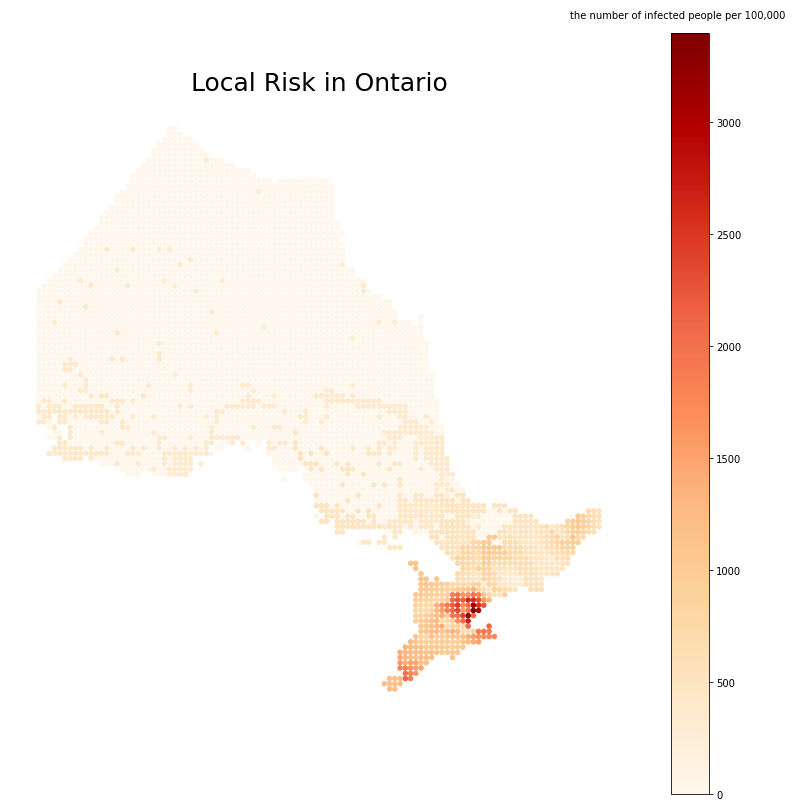

In [30]:
#fig, ax = plt.subplots(1, figsize=(14, 14), dpi=200)
fs = (14, 14)
areal_data = 'age_adjusted/areal_dataJan21/areal_Jan21.shp'
smoothed_df_combine = gpd.read_file('ATP/smoothed_atp_Jan/Jan_df_combine/smoothed_df_combine.shp')
gdf = gpd.read_file(areal_data)
base = gdf.plot(figsize=(14, 14), color='white')
output_map = smoothed_df_combine.copy()
fig = output_map.plot(ax=base,column='local_risk', cmap='OrRd',legend=True, figsize=fs,markersize=20,vmax=3400)
fig.set_title('Local Risk in Ontario', fontdict={
             'fontsize': '25', 'fontweight': '1'})
fig.legend(bbox_to_anchor=(1.26, 1.15), prop={'size': 10},title=('the number of infected people per 100,000'),frameon=False)
fig.set_axis_off()
plt.savefig('ATP/smoothed_atp_Jan/local_risk_Jan21.png')
#print(type(fig))

No handles with labels found to put in legend.


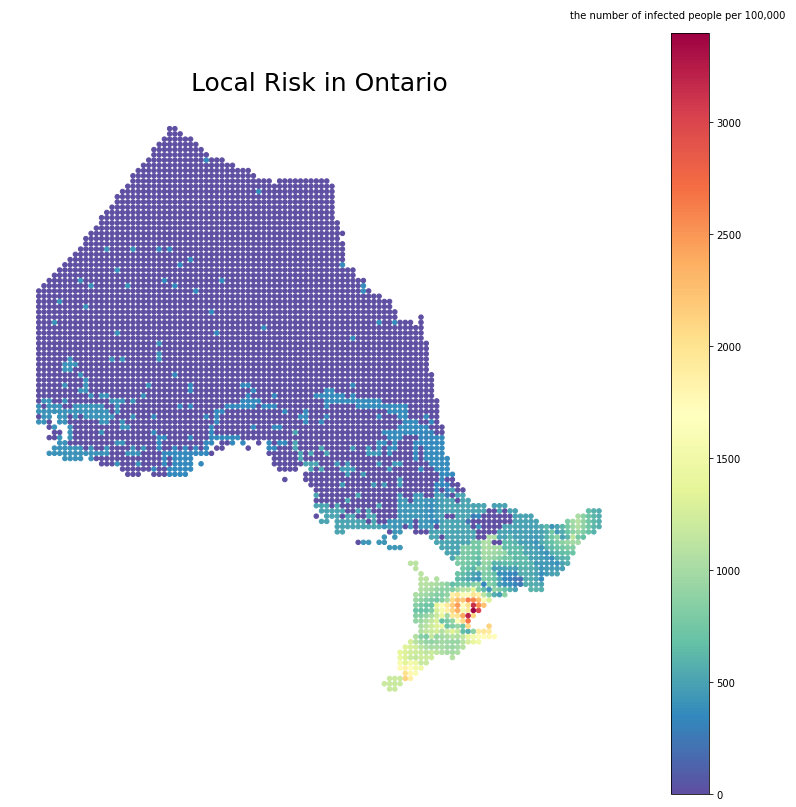

In [31]:
#fig, ax = plt.subplots(1, figsize=(14, 14), dpi=200)
fs = (14, 14)
areal_data = 'age_adjusted/areal_dataJan21/areal_Jan21.shp'
smoothed_df_combine = gpd.read_file('ATP/smoothed_atp_Jan/Jan_df_combine/smoothed_df_combine.shp')
gdf = gpd.read_file(areal_data)
base = gdf.plot(figsize=(14, 14), color='white')
output_map = smoothed_df_combine.copy()
fig = output_map.plot(ax=base,column='local_risk', cmap='Spectral_r',legend=True, figsize=fs,markersize=20,vmax=3400)
fig.set_title('Local Risk in Ontario', fontdict={
             'fontsize': '25', 'fontweight': '1'})
fig.legend(bbox_to_anchor=(1.26, 1.15), prop={'size': 10},title=('the number of infected people per 100,000'),frameon=False)
fig.set_axis_off()
plt.savefig('ATP/smoothed_atp_Jan/local_risk_Jan212.png')
#print(type(fig))

No handles with labels found to put in legend.


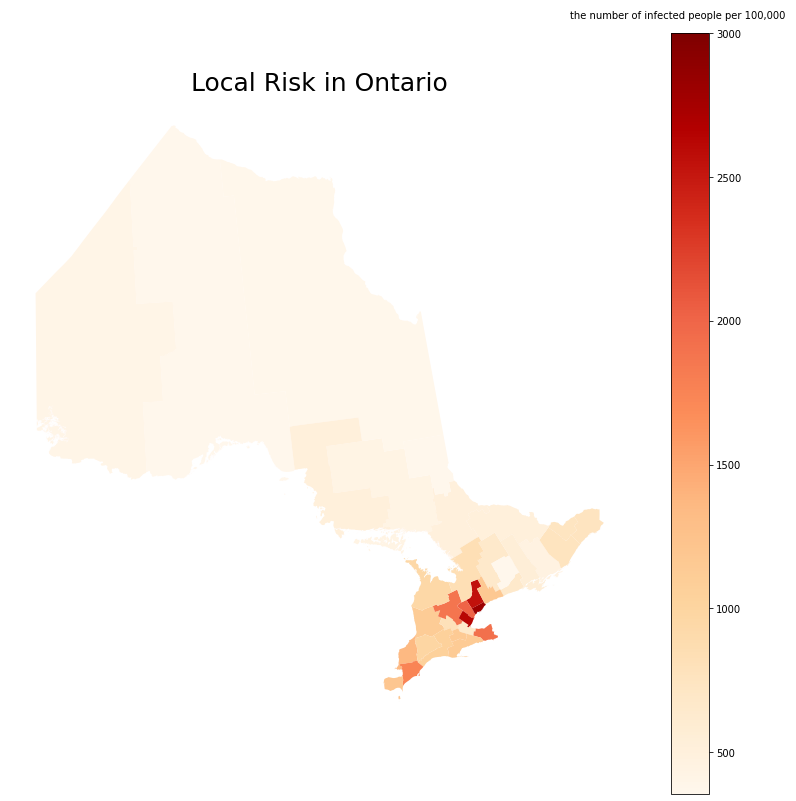

In [32]:
import matplotlib.pyplot as plt
fs = (14, 14)
areal_data = 'age_adjusted/areal_dataJan21/areal_Jan21.shp'
output_map1 = smoothed_area2_ata.copy()
#areal_data = 'areal_data/areal_data.shp'
gdf = gpd.read_file(areal_data)
#base = gdf.plot(figsize=(14, 14), color='white')
#smoothed_area.plot(ax=base, column='reg.est', cmap='Spectral_r', legend=True, markersize=20, vmax=500)
base = gdf.plot(figsize=(14, 14), color='white')
fig = output_map1.plot(ax=base,column='reg.est', cmap='OrRd',legend=True, figsize=fs,markersize=20,vmax=3000)
fig.set_title('Local Risk in Ontario', fontdict={
             'fontsize': '25', 'fontweight': '1'})
fig.legend(bbox_to_anchor=(1.26, 1.15), prop={'size': 10},title=('the number of infected people per 100,000'),frameon=False)
fig.set_axis_off()
plt.savefig('ATA/smoothed_ata_Jan/local_risk_Jan.png')

No handles with labels found to put in legend.


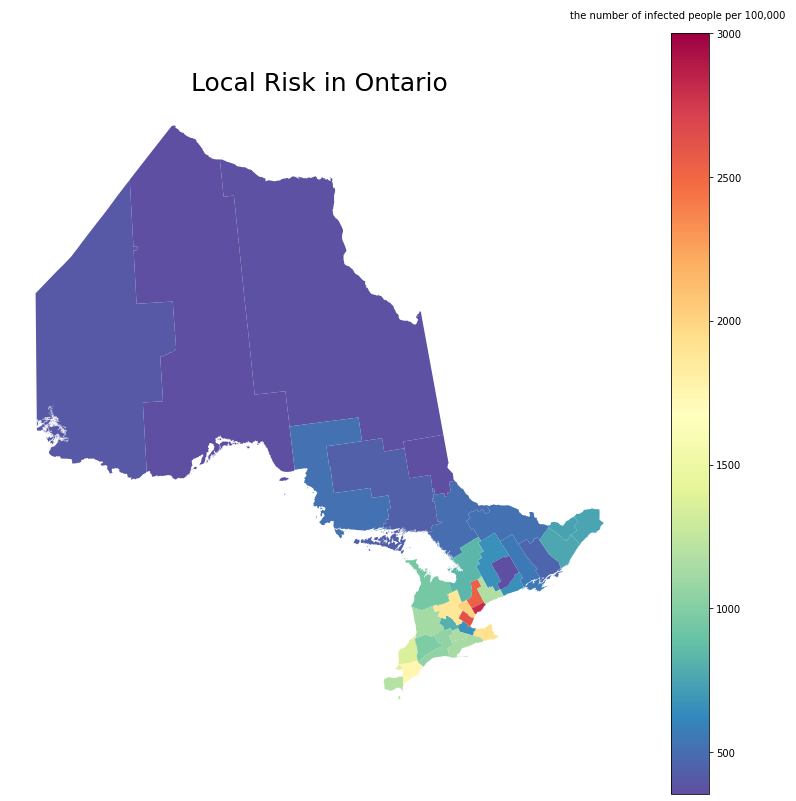

In [33]:
import matplotlib.pyplot as plt
fs = (14, 14)
areal_data = 'age_adjusted/areal_dataJan21/areal_Jan21.shp'
output_map1 = smoothed_area2_ata.copy()
#areal_data = 'areal_data/areal_data.shp'
gdf = gpd.read_file(areal_data)
#base = gdf.plot(figsize=(14, 14), color='white')
#smoothed_area.plot(ax=base, column='reg.est', cmap='Spectral_r', legend=True, markersize=20, vmax=500)
base = gdf.plot(figsize=(14, 14), color='white')
fig = output_map1.plot(ax=base,column='reg.est', cmap='Spectral_r',legend=True, figsize=fs,markersize=20,vmax=3000)
fig.set_title('Local Risk in Ontario', fontdict={
             'fontsize': '25', 'fontweight': '1'})
fig.legend(bbox_to_anchor=(1.26, 1.15), prop={'size': 10},title=('the number of infected people per 100,000'),frameon=False)
fig.set_axis_off()
plt.savefig('ATA/smoothed_ata_Jan/local_risk_Jan2.png')